In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Transactions - Data Quality Issues

## Completeness
 Are there any NULL values for any rows for any fields?

In [2]:
# Create pandas dataframe from csv and get summary of columns and null counts to check for data completeness
transactions = pd.read_csv('TRANSACTION_TAKEHOME.csv')
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RECEIPT_ID      50000 non-null  object 
 1   PURCHASE_DATE   50000 non-null  object 
 2   SCAN_DATE       50000 non-null  object 
 3   STORE_NAME      50000 non-null  object 
 4   USER_ID         50000 non-null  object 
 5   BARCODE         44238 non-null  float64
 6   FINAL_QUANTITY  50000 non-null  object 
 7   FINAL_SALE      50000 non-null  object 
dtypes: float64(1), object(7)
memory usage: 3.1+ MB


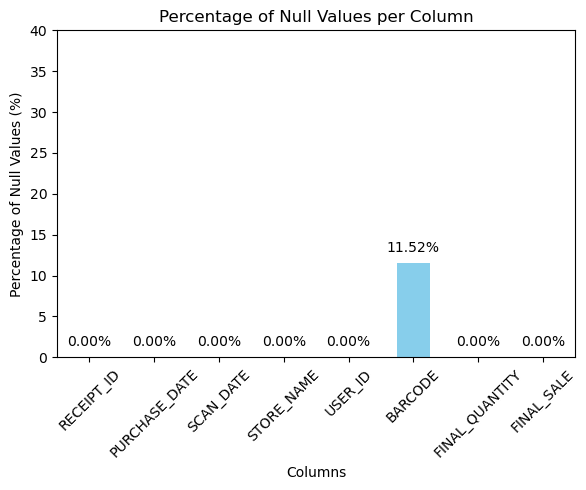

In [3]:
# Create bar graph that shows percentage of null values per column
null_percentage = transactions.isnull().mean() * 100
plt.figure(figsize=(6, 5))
ax = null_percentage.plot(kind='bar', color='skyblue')
plt.title('Percentage of Null Values per Column')
plt.xlabel('Columns')
plt.ylim(0,40)
plt.ylabel('Percentage of Null Values (%)')
plt.xticks(rotation=45)

for i, v in enumerate(null_percentage):
    ax.text(i, v + 1, f'{v:.2f}%', ha='center', va='bottom', fontsize=10)
plt.tight_layout()
plt.show()

## Validity
 For non-null values, do they make sense for their respective columns?

In [4]:
# Find unique values and counts for the RECEIPT_ID column
# Filter this to find instances of duplicate values
receipt_id_value_counts = transactions['RECEIPT_ID'].value_counts()
filtered_receipt_id_value_counts = receipt_id_value_counts[receipt_id_value_counts > 1]

print(filtered_receipt_id_value_counts)

bedac253-2256-461b-96af-267748e6cecf    12
bc304cd7-8353-4142-ac7f-f3ccec720cb3     8
4ec870d2-c39f-4a40-bf8a-26a079409b20     8
2acd7e8d-37df-4e51-8ee5-9a9c8c1d9711     8
760c98da-5174-401f-a203-b839c4d406be     8
                                        ..
56a368e6-d677-459d-ba05-70a886c3126b     2
56a0e14c-187c-43ec-96ab-b67ac5c197f1     2
569f4be9-63d1-4afd-8ed5-d520ce85b878     2
56946262-15b1-41fd-8814-fc544d35fc6c     2
fffe8012-7dcf-4d84-b6c6-feaacab5074a     2
Name: RECEIPT_ID, Length: 24440, dtype: int64


In [5]:
# Looking at examples of rows with the same RECEIPT_ID
print(transactions[transactions['RECEIPT_ID'] == '569f4be9-63d1-4afd-8ed5-d520ce85b878'])
print(transactions[transactions['RECEIPT_ID'] == 'fffe8012-7dcf-4d84-b6c6-feaacab5074a'])

                                 RECEIPT_ID PURCHASE_DATE  \
8396   569f4be9-63d1-4afd-8ed5-d520ce85b878    2024-08-11   
29396  569f4be9-63d1-4afd-8ed5-d520ce85b878    2024-08-11   

                       SCAN_DATE STORE_NAME                   USER_ID  \
8396   2024-08-14 12:22:37.353 Z     KROGER  65dd0b7116cc391732136662   
29396  2024-08-14 12:22:37.353 Z     KROGER  65dd0b7116cc391732136662   

            BARCODE FINAL_QUANTITY FINAL_SALE  
8396   1.111011e+10           1.00             
29396  1.111011e+10           1.00       7.79  
                                 RECEIPT_ID PURCHASE_DATE  \
24999  fffe8012-7dcf-4d84-b6c6-feaacab5074a    2024-09-07   
25233  fffe8012-7dcf-4d84-b6c6-feaacab5074a    2024-09-07   

                       SCAN_DATE STORE_NAME                   USER_ID  \
24999  2024-09-08 08:21:25.648 Z  WALGREENS  5f53c62bd683c715b9991b20   
25233  2024-09-08 08:21:25.648 Z  WALGREENS  5f53c62bd683c715b9991b20   

            BARCODE FINAL_QUANTITY FINAL_SALE  


In [6]:
# Find unique values and counts for the PURCHASE_DATE column, looking for invalid values
purchase_date_value_counts = transactions['PURCHASE_DATE'].value_counts().sort_values(ascending=False)

print(purchase_date_value_counts)

2024-06-15    774
2024-07-03    772
2024-07-01    752
2024-08-03    720
2024-07-13    712
             ... 
2024-09-07    428
2024-08-21    422
2024-09-06    394
2024-09-04    390
2024-09-08    282
Name: PURCHASE_DATE, Length: 89, dtype: int64


In [7]:
# Find unique values and counts for the SCAN_DATE column, looking for invalid values
scan_date_value_counts = transactions['SCAN_DATE'].value_counts().sort_values(ascending=False)

print(scan_date_value_counts)

2024-09-08 20:00:42.348 Z    12
2024-09-08 19:39:01.589 Z     8
2024-09-08 11:13:01.935 Z     8
2024-09-07 14:52:46.822 Z     8
2024-09-08 13:30:53.944 Z     8
                             ..
2024-07-01 19:06:15.029 Z     2
2024-08-03 11:16:03.549 Z     2
2024-08-08 11:25:19.555 Z     2
2024-08-15 10:27:38.237 Z     2
2024-09-08 08:21:25.648 Z     2
Name: SCAN_DATE, Length: 24440, dtype: int64


In [8]:
# Find unique values and counts for the STORE_NAME column, looking for invalid values
store_name_value_counts = transactions['STORE_NAME'].value_counts().sort_values(ascending=False)

print(store_name_value_counts)

WALMART                   21326
DOLLAR GENERAL STORE       2748
ALDI                       2640
KROGER                     1494
TARGET                     1484
                          ...  
THE MARINERS                  2
BLACK BEAR BAR & GRILL        2
MARKETPLACE                   2
CHAR&LEMON                    2
PLATEAU TRAVEL CENTER         2
Name: STORE_NAME, Length: 954, dtype: int64


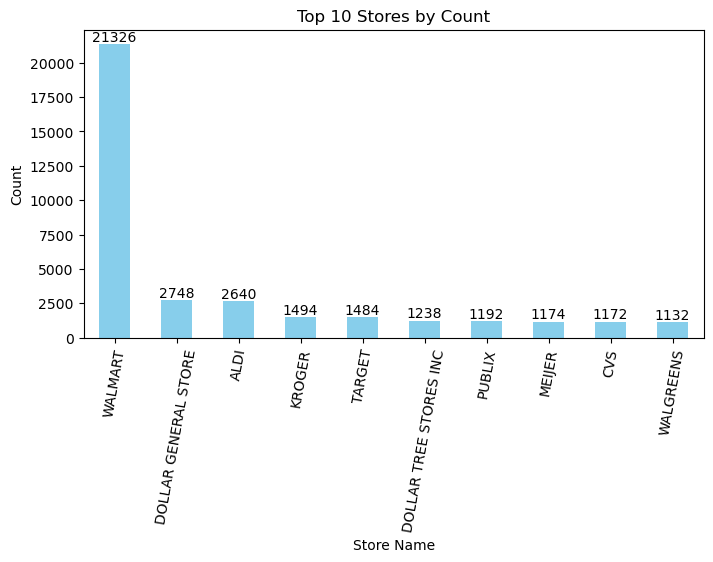

In [9]:
store_counts = transactions['STORE_NAME'].value_counts()
top_10_store_counts = store_counts.nlargest(10)

# Create the pie chart
ax = top_10_store_counts.plot(kind='bar', color='skyblue', figsize=(8, 4))

# Show the chart
plt.title('Top 10 Stores by Count')
plt.xlabel('Store Name')
plt.xticks(rotation=80)
plt.ylabel('Count') 

for i, v in enumerate(top_10_store_counts):
    ax.text(i, v + 0.2, str(v), ha='center', va='bottom', fontsize=10)
plt.show()

In [10]:
# Find unique values and counts for the USER_ID column, looking for invalid values
user_id_value_counts = transactions['USER_ID'].value_counts().sort_values(ascending=False)

print(user_id_value_counts)

64e62de5ca929250373e6cf5    22
62925c1be942f00613f7365e    20
604278958fe03212b47e657b    20
64063c8880552327897186a5    18
61d5f5d2c4525a3a478b386b    14
                            ..
5dfe8840f3aee111fbbd03d9     2
629f1735d9666655703497ae     2
62c0b0bfb79924d29cbe3248     2
64d3c11b85ea1663aef20ab1     2
62a0c8f7d966665570351bb8     2
Name: USER_ID, Length: 17694, dtype: int64


In [11]:
# Find unique values and counts for the BARCODE column, looking for invalid values
barcode_value_counts = transactions['BARCODE'].value_counts().sort_values(ascending=False)

print(barcode_value_counts)

7.874222e+10    182
5.111115e+11    168
5.111110e+11    164
7.874229e+10    158
3.111112e+11    150
               ... 
1.932000e+10      2
1.600016e+10      2
7.363931e+11      2
7.940018e+10      2
7.432310e+10      2
Name: BARCODE, Length: 11027, dtype: int64


In [12]:
# Find unique values and counts for the FINAL_QUANTITY column, looking for invalid values
final_quantity_value_counts = transactions['FINAL_QUANTITY'].value_counts().sort_values(ascending=False)

print(final_quantity_value_counts)

1.00    35698
zero    12500
2.00     1285
3.00      184
4.00      139
        ...  
2.04        1
3.69        1
0.70        1
2.52        1
2.27        1
Name: FINAL_QUANTITY, Length: 87, dtype: int64


In [13]:
# Find where FINAL_QUANITY is not a clean mutliple of 1 (ex. 2.04, 3.69) since these are not legitimate quantities of a product
non_string_values = transactions[transactions['FINAL_QUANTITY'] != 'zero']
non_integer_values = non_string_values[non_string_values['FINAL_QUANTITY'].apply(lambda x: float(x) % 1 != 0)]
print(non_integer_values['FINAL_QUANTITY'].value_counts().sort_values(ascending=False))
print(f"Total Rows Where FINAL_QUANTITY not a multiple of 1: {non_integer_values['FINAL_QUANTITY'].value_counts().sum()}")

0.23    4
1.40    4
1.35    4
0.86    3
1.28    3
       ..
3.69    1
0.70    1
2.52    1
0.48    1
2.27    1
Name: FINAL_QUANTITY, Length: 72, dtype: int64
Total Rows Where FINAL_QUANTITY not a multiple of 1: 110


In [14]:
# Find unique values and counts for the FINAL_SALE column, looking for invalid values
final_sale_value_counts = transactions['FINAL_SALE'].value_counts().sort_values(ascending=False)

print(final_sale_value_counts)

         12500
1.25      1323
1.00       744
2.99       588
1.99       586
         ...  
13.56        1
38.45        1
6.23         1
81.81        1
42.38        1
Name: FINAL_SALE, Length: 1435, dtype: int64


## Transactions - Summary
### Completeness
- Only the BARCODE column has NULL values (11.52% of rows).

- The FINAL_SALE column doesn't have NULL values, but it does have 12,500 (25%) blank values (an empty string).

### Validity
- There are 24,440 RECEIPT_IDs that have more than one row count, indicating there are duplicates.
    - For duplicate records with the same RECEIPT_IDs, some records have data in columns where it is NULL in other records. (EX. ID: 569f4be9-63d1-4afd-8ed5-d520ce85b878)
    
    - Other duplicate records have different data completely in the same column (EX. ID: fffe8012-7dcf-4d84-b6c6-feaacab5074a)
- 94 rows where the scan_date comes before the purchase date. Something has to be purchased first before the receipt can be scanned.

- 12,500 rows where QUANTITY is zero (quantity shouldn’t be zero or there is no need for a record with a BARCODE and this should be represented as an integer/float, not a string)

- 110 rows where quantity value is not a clean multiple of 1. Ex. 1.35, 1.4, 0.23. Quantities of products can’t be a decimal. 